Transfer learning using ResNet50 pre-trained model on CIFAR-10 Dataset.

In [ ]:
from tensorflow.keras import layers
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.losses import sparse_categorical_crossentropy
from keras.applications import vgg19,resnet_v2
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [ ]:
cifar_10 = keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar_10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

In [ ]:
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [ ]:
y_train=to_categorical(y_train, num_classes=10)
y_val=to_categorical(y_val, num_classes=10)
y_test=to_categorical(y_test, num_classes=10)


In [ ]:
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


In [ ]:
y_train.shape[1]

10

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
model1 = keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=(32,32,3))

80150528/80134624 [==============================] - 2s 0us/step


In [ ]:
model2 = keras.applications.ResNet50V2(weights='imagenet', include_top=False, input_shape=(32,32,3))

94683136/94668760 [==============================] - 1s 0us/step


In [ ]:
from keras import Sequential
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
Model_1 = keras.Sequential()
Model_1.add(model2)
Model_1.add(Flatten())

In [ ]:
Model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 1, 1, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
Total params: 23,564,800
Trainable params: 23,519,360
Non-trainable params: 45,440
_________________________________________________________________


In [ ]:
Model_1.add(Dense(256,activation=('relu'))) 
Model_1.add(Dropout(.4))
Model_1.add(BatchNormalization())
Model_1.add(Dense(128,activation=('relu'))) 
Model_1.add(Dropout(.3))
Model_1.add(BatchNormalization())
Model_1.add(Dense(64,activation=('relu')))
Model_1.add(Dropout(.3))
Model_1.add(BatchNormalization())
Model_1.add(Dense(10,activation=('softmax')))

In [ ]:
Model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 1, 1, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 2000)              4098000   
                                                                 
 dropout (Dropout)           (None, 2000)              0         
                                                                 
 dense_1 (Dense)             (None, 1000)              2001000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 500)               5

In [ ]:
Model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_gen = ImageDataGenerator(
                                    rotation_range=2, 
                                    horizontal_flip=True,
                                    zoom_range=.1)

val_gen = ImageDataGenerator(
                                    rotation_range=2, 
                                    horizontal_flip=True,
                                    zoom_range=.1)

test_gen= ImageDataGenerator(rotation_range=2, 
                                    horizontal_flip= True,
                                    zoom_range=.1) 

In [ ]:
train_gen.fit(x_train)
val_gen.fit(x_val)
test_gen.fit(x_test)

In [ ]:
history = Model_1.fit(train_gen.flow(x_train,y_train,batch_size=100),
                     epochs=70
                     validation_data=val_gen.flow(x_val,y_val,batch_size=100))

Epoch 1/70
350/350 [==============================] - 65s 166ms/step - loss: 1.6737 - accuracy: 0.4502 - val_loss: 1.7863 - val_accuracy: 0.4785
Epoch 2/70
350/350 [==============================] - 57s 164ms/step - loss: 1.3718 - accuracy: 0.5464 - val_loss: 1.2126 - val_accuracy: 0.5903
Epoch 3/70
350/350 [==============================] - 57s 164ms/step - loss: 1.3073 - accuracy: 0.5693 - val_loss: 1.2565 - val_accuracy: 0.5793
Epoch 4/70
350/350 [==============================] - 57s 164ms/step - loss: 1.2649 - accuracy: 0.5846 - val_loss: 1.1448 - val_accuracy: 0.6103
Epoch 5/70
350/350 [==============================] - 57s 163ms/step - loss: 1.2389 - accuracy: 0.5876 - val_loss: 1.1772 - val_accuracy: 0.5967
Epoch 6/70
350/350 [==============================] - 57s 163ms/step - loss: 1.2146 - accuracy: 0.5948 - val_loss: 1.0965 - val_accuracy: 0.6227
Epoch 7/70
350/350 [==============================] - 57s 164ms/step - loss: 1.1962 - accuracy: 0.6004 - val_loss: 1.0934 - val_ac

In [ ]:
test_eval = Model_1.evaluate(x_test,y_test)

313/313 [==============================] - 12s 31ms/step - loss: 0.9399 - accuracy: 0.6809


In [ ]:
Val_Check = Model_1.evaluate(x_val,y_val)

469/469 [==============================] - 14s 30ms/step - loss: 0.9387 - accuracy: 0.6824


In [ ]:
train_check = Model_1.evaluate(x_train,y_train)

1094/1094 [==============================] - 32s 29ms/step - loss: 0.8255 - accuracy: 0.7174


In [ ]:
Model_1.save('transferC10.h5')


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
import pandas as pd


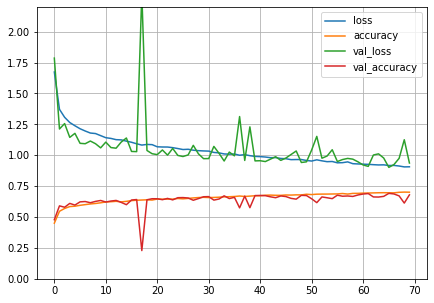

In [ ]:
pd.DataFrame(history.history).plot(figsize=(7,5))
plt.grid(True)
plt.gca().set_ylim(0,2.2)

plt.savefig('hola')




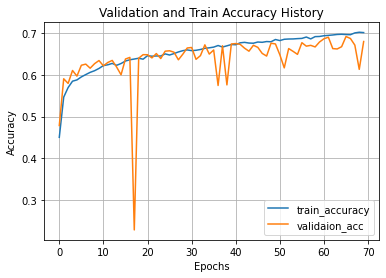

In [ ]:
plt.plot(history.history['accuracy'], label="train_accuracy")
plt.plot(history.history['val_accuracy'], label="validaion_acc")
plt.title('Validation and Train Accuracy History')
plt.legend()
plt.grid()
plt.gca()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

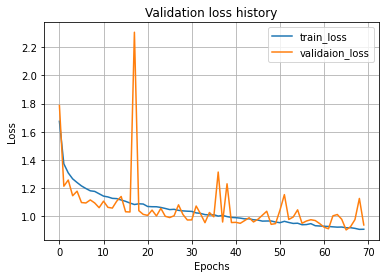

In [ ]:
plt.plot(history.history['loss'], label="train_loss")
plt.plot(history.history['val_loss'], label="validaion_loss")
plt.title('Validation loss history')
plt.legend()
plt.grid()
plt.gca()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Text(0, 0.5, 'Accuracy')

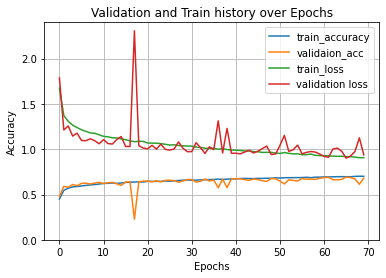

In [ ]:
fig = plt.figure
plt.plot(history.history['accuracy'], label="train_accuracy")
plt.plot(history.history['val_accuracy'], label="validaion_acc")
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.title('Validation and Train history over Epochs')
plt.legend()
plt.grid()
plt.gca().set_ylim(0,2.4)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylabel('Accuracy')